In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data= pd.read_csv(r'C:\Users\excel\OneDrive\Desktop\regr1.txt',sep=' ',header=None,names=['f','t'])

In [3]:
data

,f,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568
...,...,...
85,0.95,1.98410
86,0.96,2.00660
87,0.97,2.04930
88,0.98,2.05030


In [4]:
f= data['f'].values
t=data['t'].values
tsq=t*t

In [5]:
f

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])

In [6]:
tsq.shape

(90,)

In [7]:
## initialize the m & c
m,c=0,0

In [8]:
def train(x,y,m,c,eta):
    const= -2/len(y)
    y_cal= m*x+c
    delta_m= const*sum(x*(y-y_cal))
    delta_c= const*sum(y-y_cal)
    m=m-eta*delta_m
    c=c-eta*delta_c
    error= sum((y-y_cal)**2)/len(y)
    return m,c,error
    
def train_on_all(x,y,m,c,eta,iterations=1000):
    for step in range(iterations):
        m,c,err= train(x,y,m,c,eta)
    return m,c,err
    

In [9]:
lr=0.01

m=1.4806 c=1.55705 Error=0.487129
m=1.87741 c=1.37352 Error=0.358112
m=2.20139 c=1.18821 Error=0.264914
m=2.47876 c=1.02887 Error=0.196459
m=2.71646 c=0.892296 Error=0.146178
m=2.92019 c=0.775251 Error=0.109246
m=3.09479 c=0.674939 Error=0.0821194
m=3.24443 c=0.588967 Error=0.0621942
m=3.37267 c=0.515286 Error=0.0475589
m=3.48258 c=0.452139 Error=0.036809


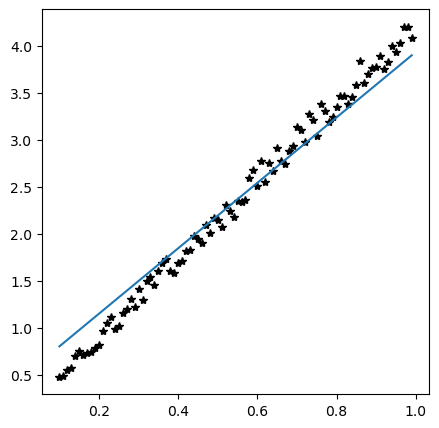

In [10]:
fig= plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
for number in range(10):
    m,c,err= train_on_all(f,tsq,m,c,lr,iterations=150)
    print('m={0:.6} c={1:.6} Error={2:.6}'.format(m,c,err))
    y= m*f +c
    ax.clear()
    ax.plot(f,tsq,'*k')
    ax.plot(f,y)
    fig.canvas.draw()
    time.sleep(1)
    

In [11]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


## Polynomial regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
adv= pd.read_csv('Advertising.csv',index_col=0)

In [17]:
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
target= adv[['sales']]

In [19]:
target

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [20]:
features= adv.drop('sales',axis=1)

In [21]:
features

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [22]:
feature_poly= PolynomialFeatures(degree=2)

In [23]:
feature_new=feature_poly.fit_transform(features)

In [25]:
feature_new

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(feature_new,target,train_size=0.75,random_state=50)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 10)
(150, 1)
(50, 10)
(50, 1)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
my_model=LinearRegression()

In [32]:
my_model

LinearRegression()

In [33]:
my_model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred= my_model.predict(x_test)

In [35]:
y_pred

array([[14.17209932],
       [11.54483935],
       [ 8.57965934],
       [10.9219029 ],
       [11.04896348],
       [18.41263999],
       [13.60743573],
       [ 5.62111612],
       [21.61606319],
       [12.21438636],
       [12.15177541],
       [12.89192519],
       [22.83667534],
       [14.59915627],
       [12.10660702],
       [17.57536243],
       [11.08716877],
       [15.74686481],
       [ 8.98171618],
       [13.14086105],
       [16.84250505],
       [10.61935504],
       [ 9.08863406],
       [12.09602523],
       [20.19108993],
       [12.82544934],
       [ 9.00904318],
       [ 9.32020797],
       [15.67064491],
       [12.38220547],
       [15.34330636],
       [10.65850623],
       [ 8.83837821],
       [16.6556557 ],
       [ 8.59464508],
       [ 9.09578477],
       [13.28257334],
       [20.11088535],
       [10.23617098],
       [11.33251169],
       [ 8.35833833],
       [25.50684943],
       [ 9.16844416],
       [19.3445872 ],
       [16.52905101],
       [ 9

In [36]:
my_model.score(x_test,y_test)

0.9850556734778735